## Medium - Fabrizio Cominetti

In this notebook I'm going to analyze my personal Medium stats. These are the stats collected during my first months using the platform. Plus, I'm not really interested in the numbers but I find out that writing is a huge boost while learning something.

Other than that, I've started writing on Medium during the summer of 2021, the year in which I've started my data science journey!

This for saying that I'm a beginner, an italian beginner. So I wasn't expecting very much but, on overall, I'm satisfacted as for now.

#### Get the data

To get the data from subscribers simply download the csv file from Medium.

Profile -> stats -> download csv

To get the metrics from the stories I need something a little more complicated, open developer tools in the stats page and paste the following code:

```
// Run Inspector Console in chrome and copy and paste the following code in the /stats/stories view
function download(filename, text) {
    var pom = document.createElement('a');
    pom.setAttribute('href', 'data:text/plain;charset=utf-8,' + encodeURIComponent(text));
    pom.setAttribute('download', filename);
if (document.createEvent) {
        var event = document.createEvent('MouseEvents');
        event.initEvent('click', true, true);
        pom.dispatchEvent(event);
    }
    else {
        pom.click();
    }
}
content = "";
content += "Story" + "," + "Views" + "," + "Reads" + "," + "readRatio" + "," + "Fans" + "\n"
rows = document.querySelectorAll(".sortableTable-row.js-statsTableRow")
rows.forEach(function(row) {
  title = row.querySelectorAll(".sortableTable-title > a")[0].innerText
  values = row.querySelectorAll(".sortableTable-value")
  views = values[1].innerText
  reads = values[2].innerText
  readRatio = values[3].innerText
  recommends = values[4].innerText
  content += '"' + title + '"' + "," + views + "," + reads + "," + readRatio + "," + recommends + "\n"
});
download("medium-metrics-" + new Date().toISOString().slice(0, 10) + ".csv", content)
```

### Load data

In [86]:
import pandas as pd

In [87]:
subscribers = pd.read_csv('data\\fabriziocominetti-subscriber-stats.csv')

In [88]:
subscribers

,period_start,period_end,followers_gained,followers_lost,followers_net,followers_total,subscribers_gained,subscribers_lost,subscribers_net,subscribers_total,referred_members_gained,referred_members_lost,referred_members_net,referred_members_total
0,2022-01-01,2022-01-31,2,0,2,67,0,0,0,4,0,0,0,0
1,2021-12-01,2021-12-31,8,1,7,65,0,0,0,4,0,0,0,0
2,2021-11-01,2021-11-30,31,0,31,58,0,0,0,4,0,0,0,0
3,2021-10-01,2021-10-31,9,0,9,27,2,0,2,4,0,0,0,0
4,2021-09-01,2021-09-30,7,0,7,18,0,0,0,2,0,0,0,0
5,2021-08-01,2021-08-31,11,0,11,11,2,0,2,2,0,0,0,0


In [89]:
metrics = pd.read_csv('data\\medium-metrics-2022-01-01.csv')

In [90]:
metrics.head()

,Story,Views,Reads,readRatio,Fans
0,Create a QRcode with Python in 2 Minutes,44,22,50.000000,1
1,How to Combine R-Markdown and GitHub,86,53,61.627907,3
2,Explore Your own Instagram Followers Without a...,49,24,48.979592,1
3,Exploring Hot 100 Billboard’s weekly Charts wi...,132,35,26.515152,4
4,Free Websites and Games to Rapidly Improve you...,68,19,27.941176,3


### Data manipulation

In [91]:
subscribers.dtypes

period_start               object
period_end                 object
followers_gained            int64
followers_lost              int64
followers_net               int64
followers_total             int64
subscribers_gained          int64
subscribers_lost            int64
subscribers_net             int64
subscribers_total           int64
referred_members_gained     int64
referred_members_lost       int64
referred_members_net        int64
referred_members_total      int64
dtype: object

In [92]:
subscribers = subscribers.drop(['referred_members_gained', 'referred_members_lost', 'referred_members_net', 'referred_members_total'], axis=1)

In [93]:
subscribers = subscribers.iloc[1: , :]

In [94]:
subscribers['period_start'] = pd.to_datetime(subscribers['period_start'])

In [95]:
subscribers['period_end'] = pd.to_datetime(subscribers['period_end'])

In [96]:
subscribers.dtypes

period_start          datetime64[ns]
period_end            datetime64[ns]
followers_gained               int64
followers_lost                 int64
followers_net                  int64
followers_total                int64
subscribers_gained             int64
subscribers_lost               int64
subscribers_net                int64
subscribers_total              int64
dtype: object

In [97]:
subscribers['month_num'] = subscribers['period_start'].dt.month

In [98]:
subscribers['month_name'] = subscribers['period_start'].dt.month_name().str.slice(stop=3)

In [99]:
metrics.dtypes

Story         object
Views          int64
Reads          int64
readRatio    float64
Fans           int64
dtype: object

### Data exploration

Month with max followers gained

In [100]:
subscribers.loc[subscribers['followers_gained'].idxmax()]

period_start          2021-11-01 00:00:00
period_end            2021-11-30 00:00:00
followers_gained                       31
followers_lost                          0
followers_net                          31
followers_total                        58
subscribers_gained                      0
subscribers_lost                        0
subscribers_net                         0
subscribers_total                       4
month_num                              11
month_name                            Nov
Name: 2, dtype: object

In [101]:
subscribers[subscribers['followers_gained'] == subscribers['followers_gained'].max()]

,period_start,period_end,followers_gained,followers_lost,followers_net,followers_total,subscribers_gained,subscribers_lost,subscribers_net,subscribers_total,month_num,month_name
2,2021-11-01,2021-11-30,31,0,31,58,0,0,0,4,11,Nov


Apparently, November was my lucky month!

Story with max views

In [102]:
metrics[metrics['Views'] == metrics['Views'].max()]

,Story,Views,Reads,readRatio,Fans
5,EDA: Analyze your own Netflix Data,830,268,32.289157,17


As we can see from above, the story that reached the maximum number of views is 'EDA: Analyze your own Netflix Data'.

Stories ordered by views count

In [103]:
views_ord = metrics.sort_values(by='Views', ascending=False)

In [104]:
views_ord

,Story,Views,Reads,readRatio,Fans
5,EDA: Analyze your own Netflix Data,830,268,32.289157,17
10,Non-linear Data Structures you Must know for D...,567,224,39.506173,7
12,Master Your Python Skills With These Free Games,393,137,34.860051,10
15,Programming Naming Conventions,382,200,52.356021,8
9,Learn how to spot Fake News with these Free Games,329,127,38.601824,5
13,Build a Random Password Generator with Python,223,107,47.982063,10
11,Linear Data Structures you Must know for Data ...,136,60,44.117647,6
3,Exploring Hot 100 Billboard’s weekly Charts wi...,132,35,26.515152,4
7,Basic Shell Commands and Concepts to Master as...,111,29,26.126126,5
1,How to Combine R-Markdown and GitHub,86,53,61.627907,3


Stories with max reads

Apart from views, it's interesting to analyze how many reads each story got, since it's a more relevant statistic of other users engagement.

In [105]:
reads_ord = metrics.sort_values(by='Reads', ascending=False)

In [106]:
reads_ord.head(3)

,Story,Views,Reads,readRatio,Fans
5,EDA: Analyze your own Netflix Data,830,268,32.289157,17
10,Non-linear Data Structures you Must know for D...,567,224,39.506173,7
15,Programming Naming Conventions,382,200,52.356021,8


Stories engagement according to readRatio

In [107]:
readRatio_ord = metrics.sort_values(by='readRatio', ascending=False)

In [108]:
readRatio_ord.head()

,Story,Views,Reads,readRatio,Fans
1,How to Combine R-Markdown and GitHub,86,53,61.627907,3
15,Programming Naming Conventions,382,200,52.356021,8
0,Create a QRcode with Python in 2 Minutes,44,22,50.000000,1
2,Explore Your own Instagram Followers Without a...,49,24,48.979592,1
13,Build a Random Password Generator with Python,223,107,47.982063,10


It's relevant to note that these are probably my less-during stories. We can extract that people on Medium are searching for rapid lectures. Or maybe it's my problem.

Compute the total number of views for my 2021 (starting since August btw)

In [109]:
metrics['Views'].sum()

3522

Mean views by story

In [110]:
metrics['meanV'] = metrics['Views'].mean()

In [111]:
metrics[['Story', 'meanV']]

,Story,meanV
0,Create a QRcode with Python in 2 Minutes,207.176471
1,How to Combine R-Markdown and GitHub,207.176471
2,Explore Your own Instagram Followers Without a...,207.176471
3,Exploring Hot 100 Billboard’s weekly Charts wi...,207.176471
4,Free Websites and Games to Rapidly Improve you...,207.176471
5,EDA: Analyze your own Netflix Data,207.176471
6,Basic Shell Commands and Concepts to Master as...,207.176471
7,Basic Shell Commands and Concepts to Master as...,207.176471
8,Basic Shell Commands and Concepts to Master as...,207.176471
9,Learn how to spot Fake News with these Free Games,207.176471


Mean readRatio

In [112]:
metrics['meanrR'] = metrics['readRatio'].mean()

In [113]:
metrics[['Story', 'meanrR']]

,Story,meanrR
0,Create a QRcode with Python in 2 Minutes,40.074119
1,How to Combine R-Markdown and GitHub,40.074119
2,Explore Your own Instagram Followers Without a...,40.074119
3,Exploring Hot 100 Billboard’s weekly Charts wi...,40.074119
4,Free Websites and Games to Rapidly Improve you...,40.074119
5,EDA: Analyze your own Netflix Data,40.074119
6,Basic Shell Commands and Concepts to Master as...,40.074119
7,Basic Shell Commands and Concepts to Master as...,40.074119
8,Basic Shell Commands and Concepts to Master as...,40.074119
9,Learn how to spot Fake News with these Free Games,40.074119


40% of people who viewed my stories kept reading them. I think that's a great result considering that now we prefer 'to scroll' over stories rather than effectively reading them.

### Data visualization

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
subscribers.columns

Index(['period_start', 'period_end', 'followers_gained', 'followers_lost',
       'followers_net', 'followers_total', 'subscribers_gained',
       'subscribers_lost', 'subscribers_net', 'subscribers_total', 'month_num',
       'month_name'],
      dtype='object')

In [116]:
metrics.columns

Index(['Story', 'Views', 'Reads', 'readRatio', 'Fans', 'meanV', 'meanrR'], dtype='object')

Plotting gained followers over months

In [123]:
month_ord = subscribers.sort_values(by='month_num')

In [124]:
month_ord

,period_start,period_end,followers_gained,followers_lost,followers_net,followers_total,subscribers_gained,subscribers_lost,subscribers_net,subscribers_total,month_num,month_name
5,2021-08-01,2021-08-31,11,0,11,11,2,0,2,2,8,Aug
4,2021-09-01,2021-09-30,7,0,7,18,0,0,0,2,9,Sep
3,2021-10-01,2021-10-31,9,0,9,27,2,0,2,4,10,Oct
2,2021-11-01,2021-11-30,31,0,31,58,0,0,0,4,11,Nov
1,2021-12-01,2021-12-31,8,1,7,65,0,0,0,4,12,Dec


<AxesSubplot:xlabel='month_name', ylabel='followers_gained'>

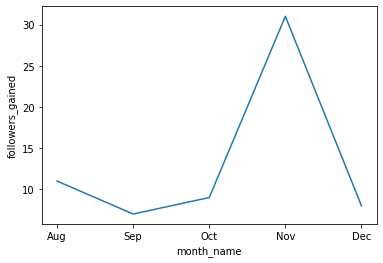

In [125]:
sns.lineplot(data=month_ord, x='month_name', y='followers_gained')

Bar plot with number of views

In [128]:
top3_views = views_ord.head(3)

<AxesSubplot:xlabel='Views', ylabel='Story'>

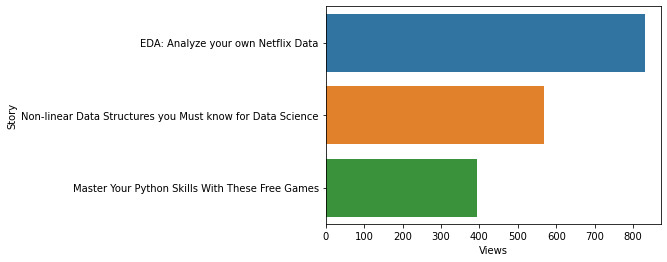

In [130]:
sns.barplot(x='Views', y='Story', data=top3_views)